In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\Regression\day1\takehome\baseballs.csv')

In [39]:
df.head()

,batting_average,runs_scored,doubles_at_bat,triples_at_bat,home_runs,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
batting_average    45 non-null float64
runs_scored        45 non-null float64
doubles_at_bat     45 non-null float64
triples_at_bat     45 non-null float64
home_runs          45 non-null float64
strike_outs        45 non-null float64
dtypes: float64(6)
memory usage: 2.2 KB


# y = runs scored & remaining all x 

In [41]:
q1 =df.batting_average.quantile(0.25)
q3 =df.batting_average.quantile(0.75)
IQR = q3-q1
ll = 
q1

SyntaxError: invalid syntax (<ipython-input-41-f57daae1f9ee>, line 4)

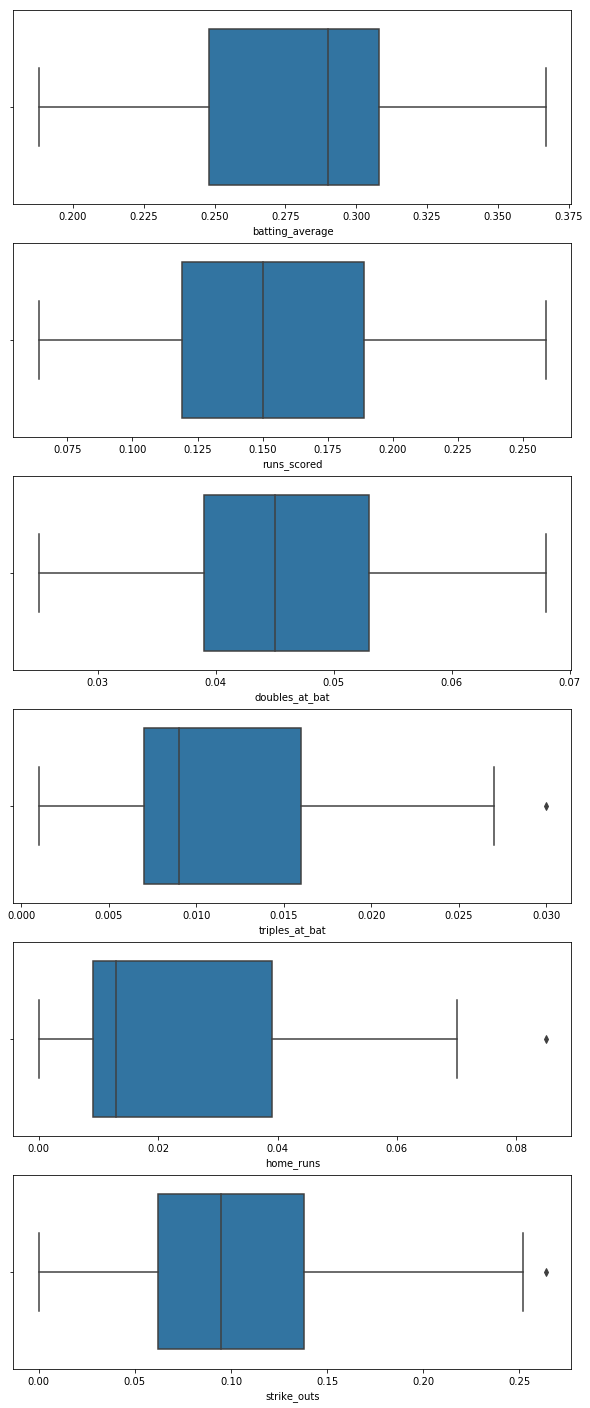

In [42]:
fig,axes =plt.subplots(6,1,figsize =(10,25))
sns.boxplot(df.batting_average,ax = axes[0])
sns.boxplot(df.runs_scored,ax = axes[1])
sns.boxplot(df.doubles_at_bat,ax = axes[2])
sns.boxplot(df.triples_at_bat,ax = axes[3])
sns.boxplot(df.home_runs,ax = axes[4])
sns.boxplot(df.strike_outs,ax = axes[5])
plt.show()

only one oulier is there in the double,triple,homeruns.so, if possible try to remove ; as data is very low in our case we are keeping them.

In [43]:
y =df['runs_scored']
X = df.drop(columns ='runs_scored')
y.shape,X.shape

((45,), (45, 5))

In [22]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size =0.30,random_state =1)

In [23]:
from sklearn.linear_model import LinearRegression


In [27]:
linreg = LinearRegression()
model = linreg.fit(Xtrain,ytrain)
model.coef_  ,model.intercept_


(array([ 0.60114677, -0.40169362,  2.70775134,  0.46603766,  0.12974663]),
 -0.053672492740349326)

In [45]:
  # test error
print(f'R^2 score for test: {model.score(Xtest,ytest)}')
 # train error.
print(f'R^2 score for test: {model.score(Xtrain,ytrain)}')
ypredict = model.predict(Xtest)

R^2 score for test: 0.7159928141769802
R^2 score for test: 0.7551402413803663


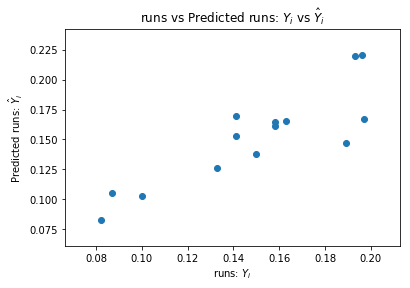

In [36]:
plt.scatter(ytest, ypredict)
#plt.plot(ytest,ypredict,color ='red')
plt.xlabel("runs: $Y_i$")
plt.ylabel("Predicted runs: $\hat{Y}_i$")
plt.title("runs vs Predicted runs: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Test of assumptions

In [ ]:
## Raw OLS Model

In [48]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            runs_scored   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     26.17
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.70e-11
Time:                        20:25:04   Log-Likelihood:                 112.40
No. Observations:                  45   AIC:                            -212.8
Df Residuals:                      39   BIC:                            -202.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0572      0.041     -1.411      0.166      -0.139       0.025
batting_average     0.6684      0.164      4.074      0.000       0.337       1.000
doubles_at_bat     -0.3787      0.425     -0.891      0.378      -1.238       0.481
triples_at_bat      1.5163      0.679      2.234      0.031       0.144       2.889
home_runs           0.5172      0.197      2.621      0.012       0.118       0.916
strike_outs         0.0816      0.083      0.979      0.333      -0.087       0.250
==============================================================================
Omnibus:                        1.908   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.390
Skew:                           0.430   Prob(JB):                        0.499
Kurtosis:                       3.038   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check the Asumptions of Linear Regression

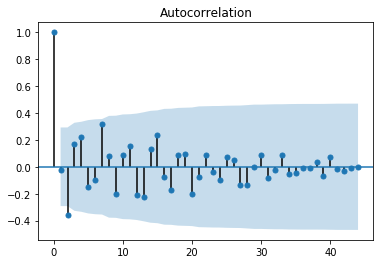

In [52]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid , lags=44 , alpha=0.05)
                            
acf.show()

##### Assumption 2- Normality of Residuals
2) The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.
    
The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [54]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(1.390340057587913, 0.4989895981723108)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.

In this case the computed value of the JB statistic 1.39 is less than 5.99. Thus we fail to reject the null hypothesis that the error terms are  not normally distributed.so,the distribution is normal.

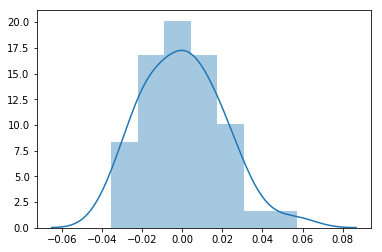

In [55]:
import seaborn as sns

sns.distplot(lin_reg.resid)

For normality using Q-Q plot

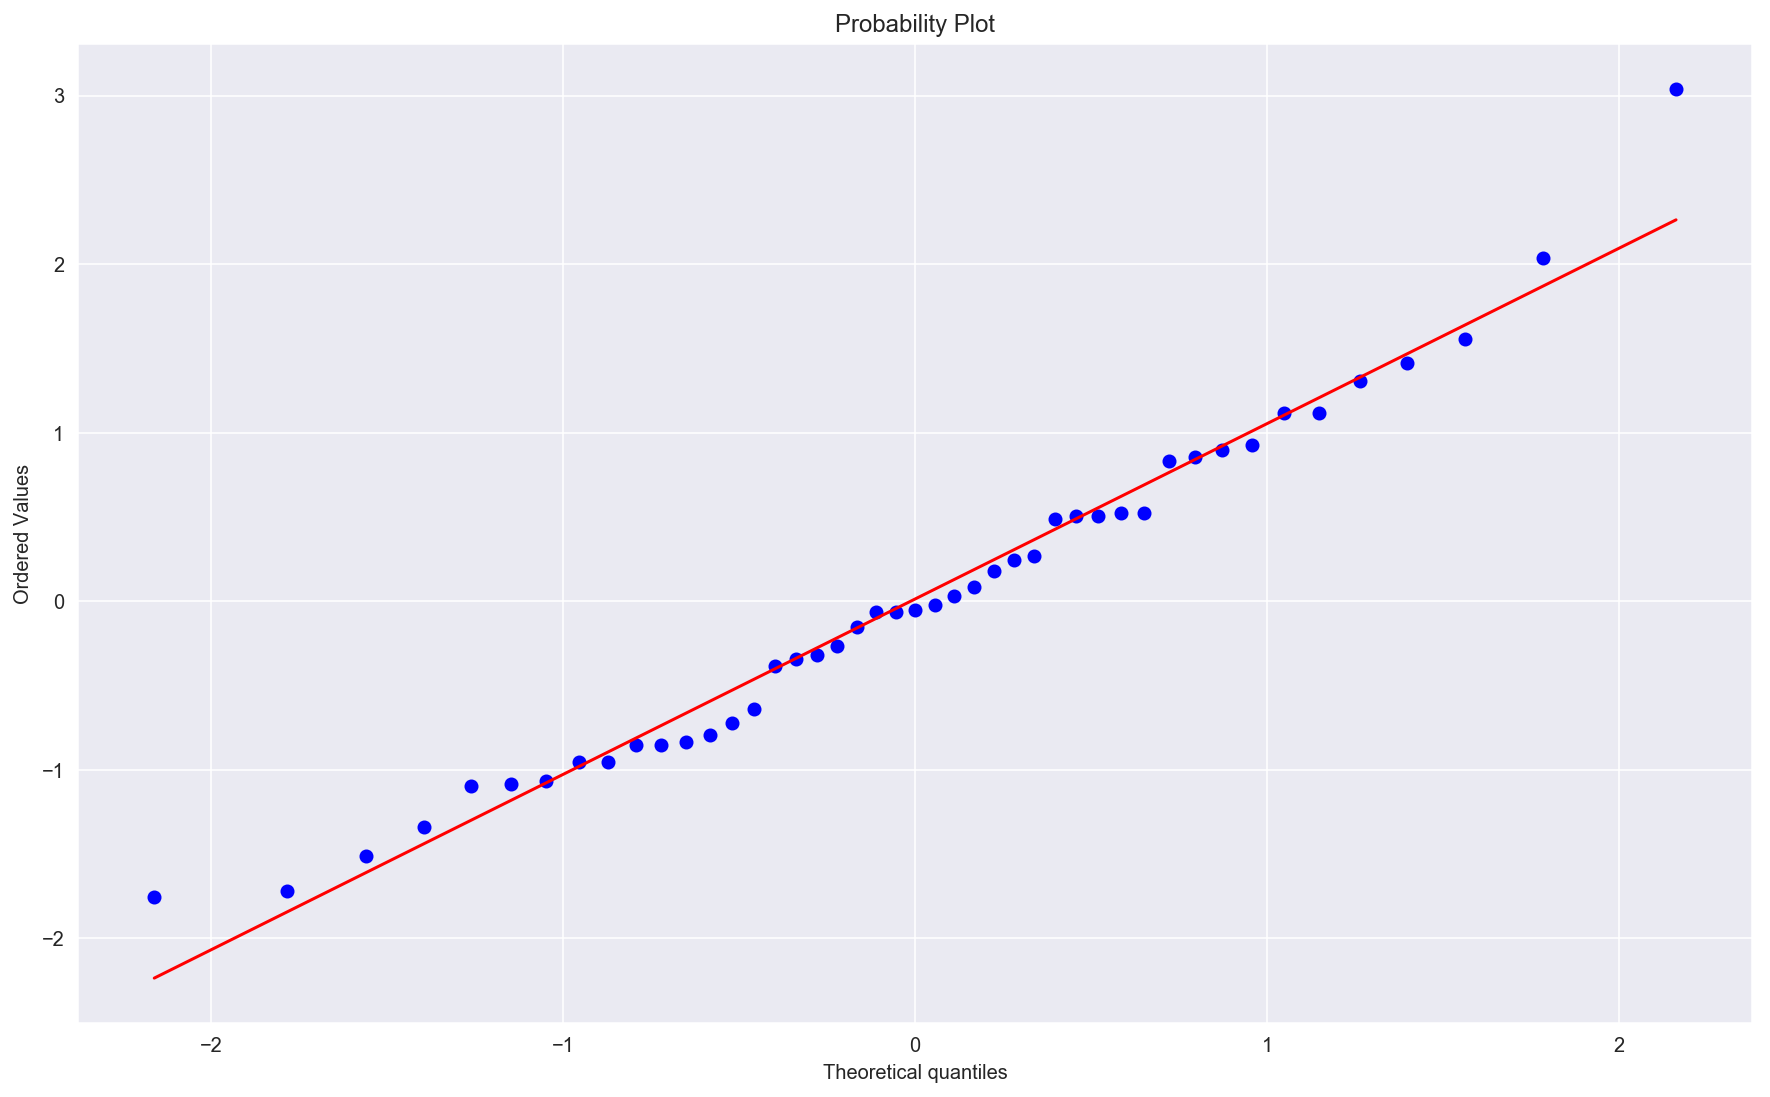

In [60]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

EXPECTATION : THE MEAN VALUE OF THE RESIDUALS SHOULD BE ZERO.
LET's CHECK

In [61]:
lin_reg.resid.mean()

-2.3746436915593625e-16

In [ ]:
Very much close to zero. -1.11 * 10^(-14)

So, linearity is present.

## Asssumption 3 - Linearity of residuals

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
OR
We can go for rainbow test. Let's look both of them one by one.

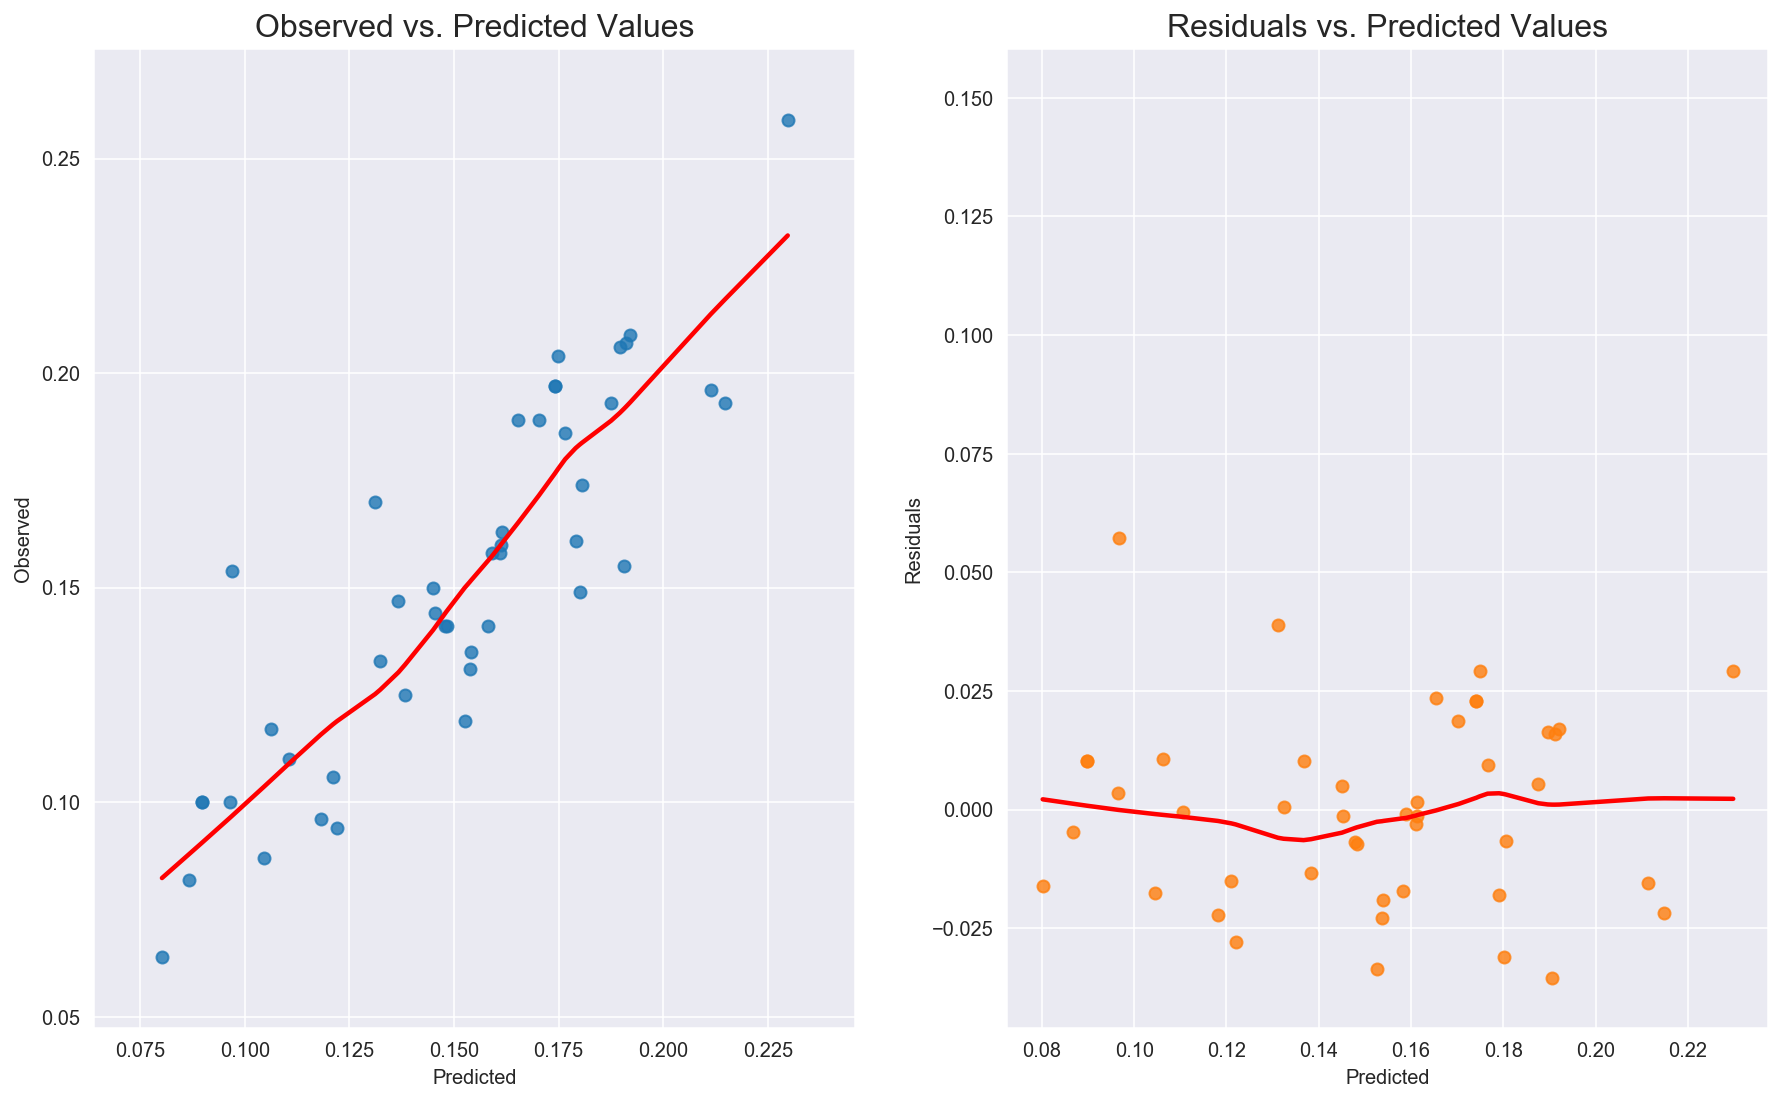

In [57]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y) 

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter one. In both cases linearity of residuals can be seen.

## Rainbow test
It is done to check the linearity of the residuals for a linear regression model. Linearity of residuals is preferred.

In [58]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.6807702316220778, 0.8048901745634596)

### Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎
𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎
The residuals should be homoscedastic.

[('F statistic', 1.0879475435584445), ('p-value', 0.43108493882693916)]

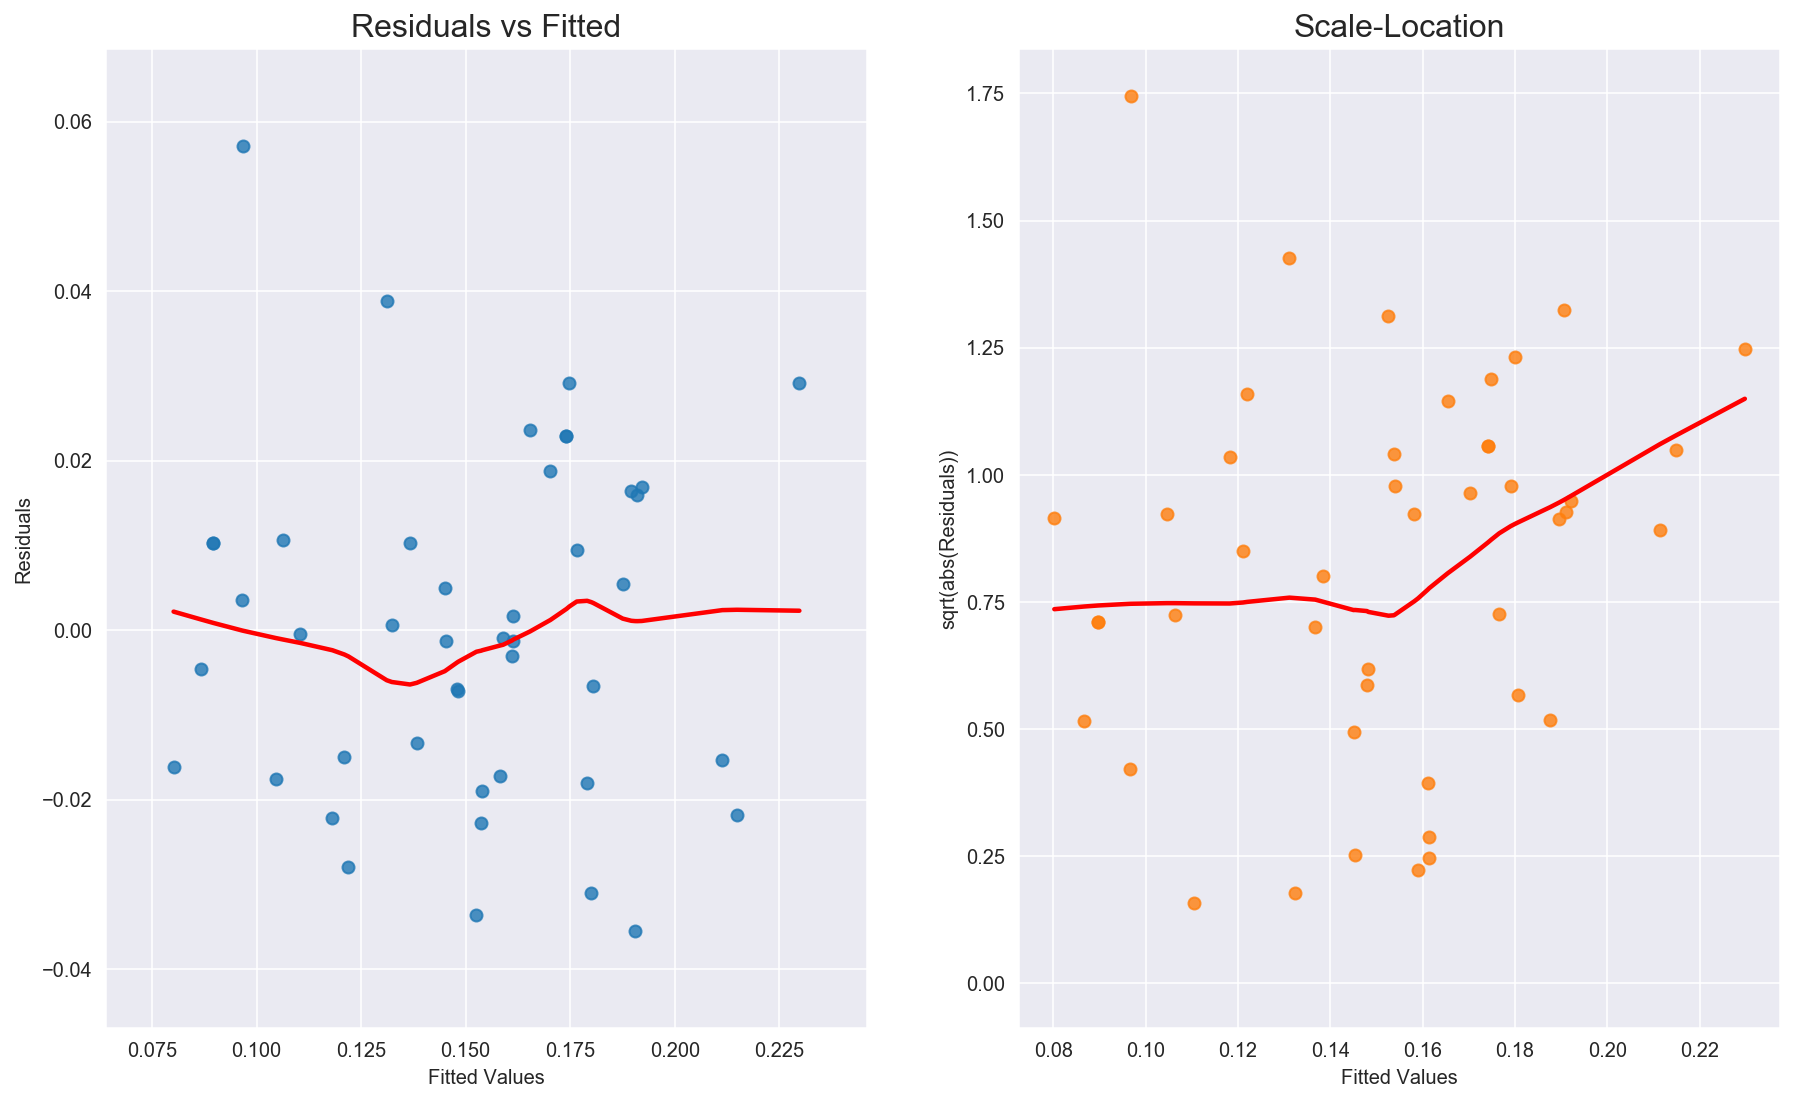

In [62]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them the null hypothesis assumes homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

Here, p value is less than 0.05 so, it is homoscedasticity distribution.

𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎
 
𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎

### Assumption 5- NO MULTI COLLINEARITY
The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T
#variance inflation factor.# becuase 

,batting_average,doubles_at_bat,triples_at_bat,home_runs,strike_outs
vif,5.014869,1.899355,2.146511,1.856419,2.658188


So, multicollinearity exists.

Note : This vif column has be built with the help of X_constant and not the X_values. Because we built our model by adding Constant.

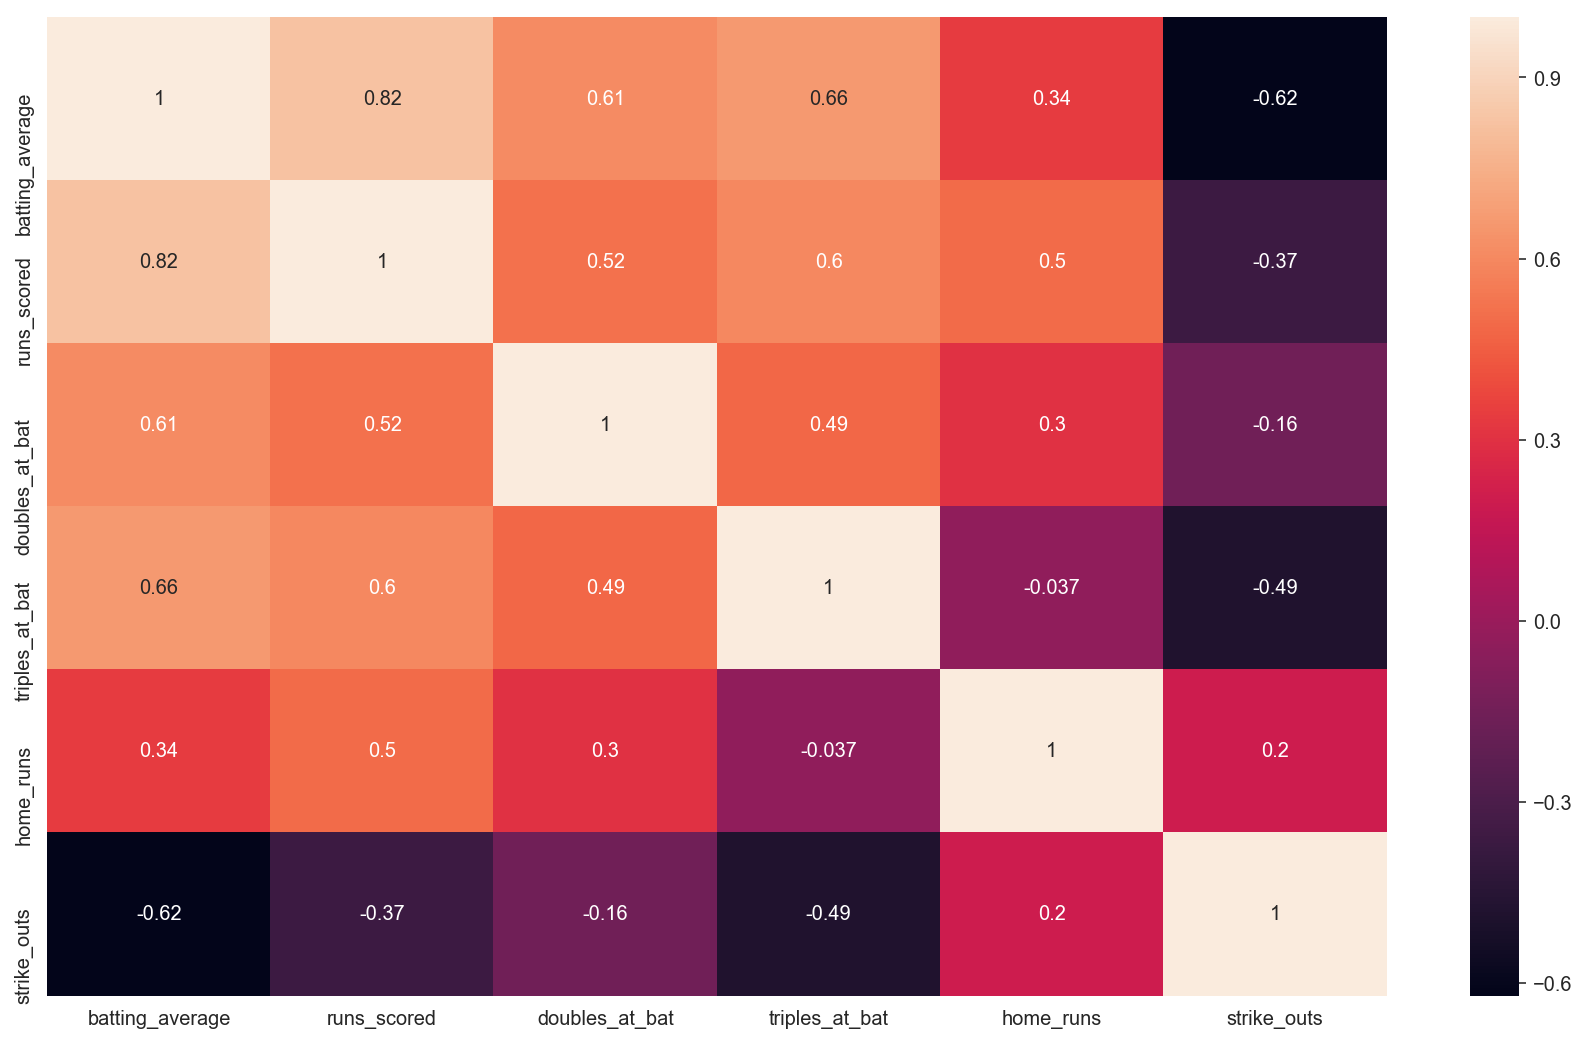

In [67]:
sns.heatmap(df.corr(), annot=True)

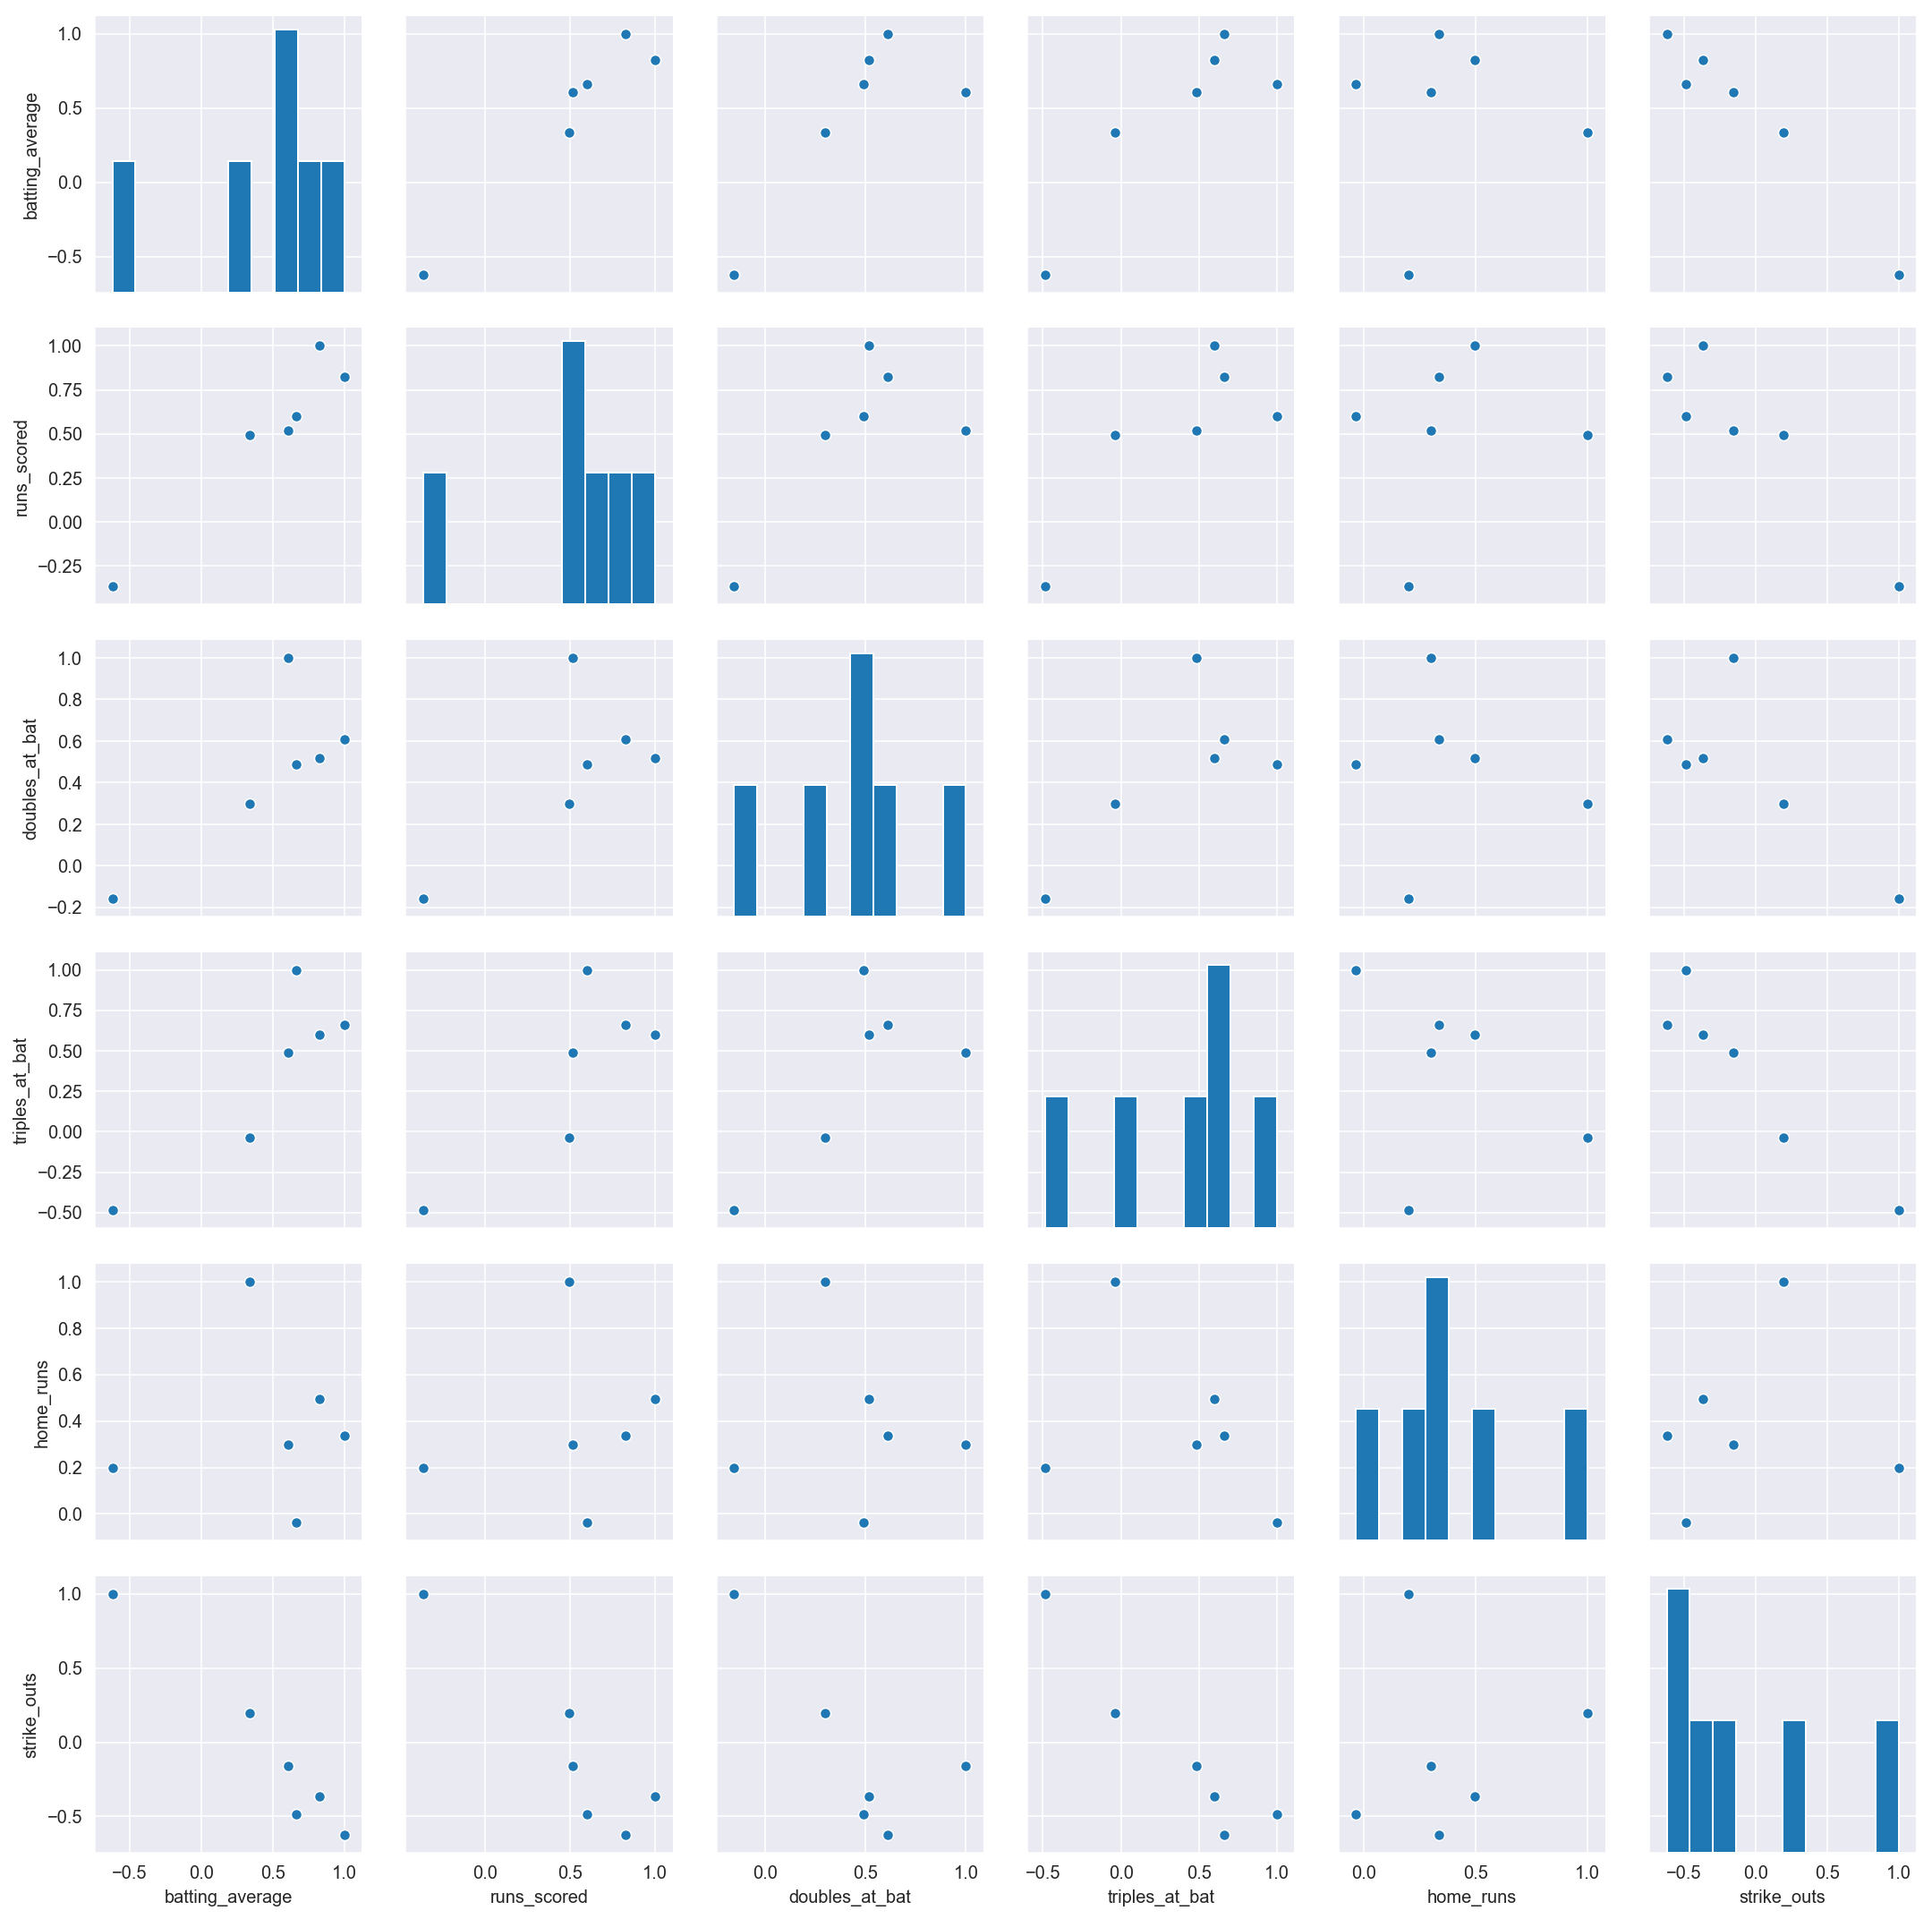

In [68]:
sns.pairplot(df.corr())